# Лабораторная работа 2

## Фильтрация методом когерентного накопления

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15 с.
2. Построить графики звукового сигнала во временной и частотной области.
3. Добавить нормальный шум мощностью сопоставимой с мощностью звукового сигнала.
4. Построить графики сигнала во временной и частотной области.
5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.
6. Провести фильтрацию сигнала методом когерентного накопления для количества реализаций 𝑁.
7. Построить графики сигнала во временной и частотной области.
8. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

### 1. Загружаем нужный файл

In [1]:
from IPython.display import Audio
from librosa import load
from soundfile import write


(data, sampling_rate) = load('../assets/melody.mp3')
write('melody.wav', data=data, samplerate=sampling_rate)

Audio('melody.wav')

In [2]:
(data, sampling_rate) = load('melody.wav')
print(data, sampling_rate)

[-0.00979614 -0.01586914 -0.01086426 ...  0.          0.
  0.        ] 22050


### 2. Строим графики

Text(0.5, 23.52222222222222, 'Время, с')

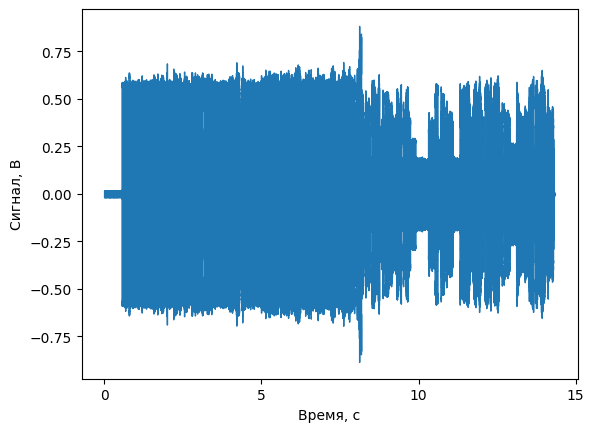

In [3]:
from librosa.display import waveshow
import matplotlib.pyplot as plt

waveshow(data, sr=sampling_rate)
plt.ylabel('Сигнал, В')
plt.xlabel('Время, с')

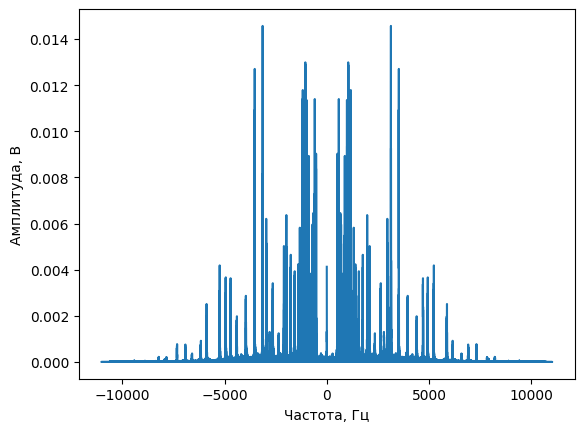

In [4]:
import numpy as np
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.plot(freq, np.abs(sp / length))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(data)

### 3. Генерируем шум

(100, 316248)


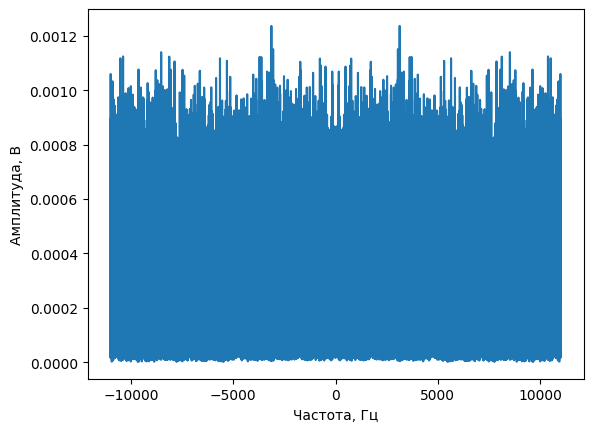

In [5]:
measurements_count = 100
noise = np.random.normal(loc=0.0, scale=0.20, size=(measurements_count, len(data)))

freq_plot(noise[0])
print(noise.shape)

#### Добавляем шум к сигналу

In [6]:
noisy_data = np.tile(data, (measurements_count, 1)) + noise

print(noisy_data.shape)

(100, 316248)


#### Сохраняем сигнал

In [7]:
write(
    "noisy_melody.wav",
    data=noisy_data[0],
    samplerate=sampling_rate
)

Audio("noisy_melody.wav")

### 5. Строим графики зашумленного сигнала

Text(0.5, 23.52222222222222, 'Время, с')

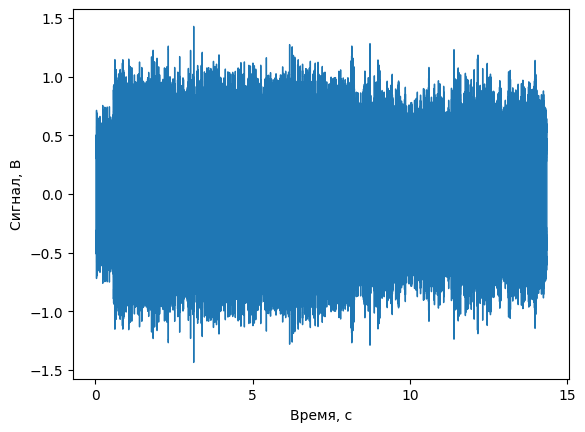

In [8]:
waveshow(noisy_data[0])
plt.ylabel('Сигнал, В')
plt.xlabel('Время, с')

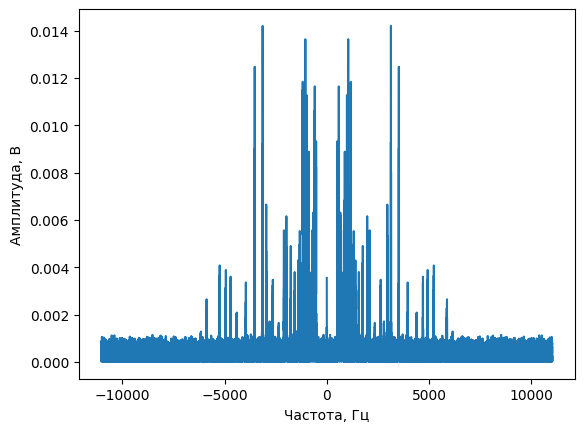

In [9]:
freq_plot(noisy_data[0])

### 6. Проведем фильтрацию полученного сигнала

In [10]:
filtered = np.average(noisy_data, axis=0)

print(filtered)

[ 0.00901037 -0.03237393 -0.03026906 ... -0.05329702  0.0209253
 -0.01992897]


### 7. Построим графики

Text(0.5, 23.52222222222222, 'Время, с')

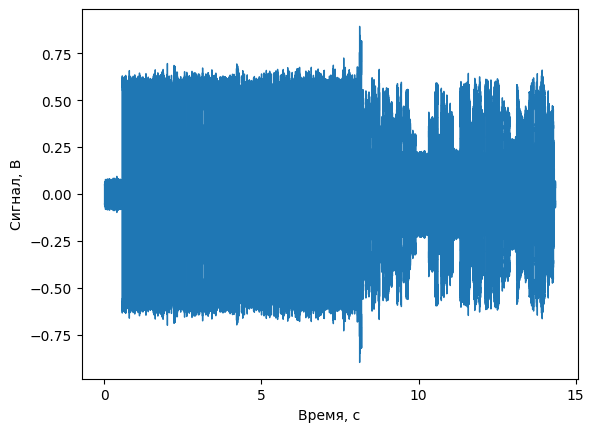

In [11]:
waveshow(filtered)
plt.ylabel('Сигнал, В')
plt.xlabel('Время, с')

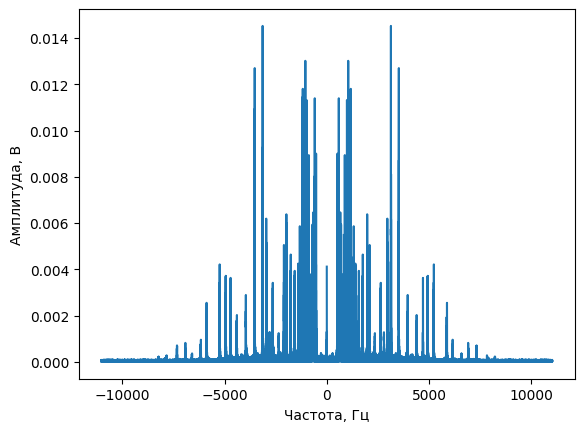

In [12]:
freq_plot(filtered)

### 8. Сохраним и послушаем

In [13]:
write(
    "filtered_melody.wav",
    data=filtered,
    samplerate=sampling_rate
)

Audio("filtered_melody.wav")

## Контрольные вопросы

#### 1. Назовите ограничения применения метода синхронной фильтрации (когерентного накопления).

Данный метод можно применять только в ситуации, когда у нас есть возможность заполучить несколько "замеров" одного и того же исходного сигнала (он постоянен или является периодической функцией) и при этом в них будет поступать стационарный шум (его характеристики не меняются со временем).

#### 2. Какой параметр метода синхронной фильтрации (когерентного накопления) определяет качество результирующего сигнала?

nK - Количество накоплений

#### 3. Приведите пример прикладного использования метода синхронной фильтрации (когерентного накопления).

В локации.
Еще, оказывается, в электрофизиологии, например, при [исследовании вызванных потенциалов мозга](http://www.cnshb.ru/AKDiL/0049/base/RK/001580.shtm)


#### 4. Для какого типа шума эффективно применение метода синхронной фильтрации (когерентного накопления)?

Для стационарного шума

#### 5. Попробуйте кратко пояснить суть метода синхронной фильтрации (когерентного накопления), используя термины «детерминированный сигналы» и «случайный сигналы».

Если усреднить множество повторений детерминированного сигнала, он не изменится, но если усреднить то же множество случайного сигнала, он просто станет ближе к постоянному, а значит если усреднить повторения исходного сигнала (сумму детерминированного и случайного), то на выходе получим более чистый детерминированный сигнал
